In [1]:
#importando bibliotecas python.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lendo o arquivo 'train' do titanic.

df = pd.read_csv('dataSets/train.csv')

In [3]:
#Imprimir as 5 primeiras linhas do dataset.

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Verificar o tamanho do dataset.

df.shape

(891, 12)

In [34]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.718485,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.260004,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Verificar quantos 'NaN'existem na coluna 'Cabin'.

len(df['Cabin'].loc[df['Cabin'].isna()==True])

687

In [6]:
#Foi verificado que existem muitos 'NaN'na coluna 'Cabin', o que não ajuda na predição, portanto a coluna
#será descartada do dataset.

df.drop('Cabin', inplace=True, axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
#Verificando quantos valores nulos/vazios existem no dataset.

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [8]:
#Foi verificado que existem 177 valores nulos de 'Age'. Filtrando os valores nulos de 'Age''

df.loc[df['Age'].isnull()==True].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


In [9]:
# Tratativa: verificar a média da idade dos passageiros, de acordo com título (mr, mrs, miss, etc..)
#dado a eles no nome e lançar aos valores nulos.

#Separando o primero nome do ultimo nome.
# new data frame with split value columns 
new = df["Name"].str.split(",", n = 1, expand = True) 

#Adicionando as novas colunas ao dataframe
# making separate first name column from new data frame 
df["FirstName"]= new[0] 
  
# making separate last name column from new data frame 
df["LastName"]= new[1]
  
# df display 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FirstName,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,Mr. William Henry


In [10]:
#df.drop(columns=['First Name', 'Last Name', 'FirstName', 'LastName'], inplace=True)

In [11]:
#Fazendo o mesmo processo para separar os nomes pelo pronome de tratamento.

# new data frame with split value columns 
new = df["LastName"].str.split(".", n = 1, expand = True) 

#Adicionando as novas colunas ao dataframe
# making separate first name column from new data frame 
df["treatmentPronoun"]= new[0] 
  
# making separate last name column from new data frame 
df["LastName"]= new[1]
  
# df display 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FirstName,LastName,treatmentPronoun
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Owen Harris,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Laina,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Jacques Heath (Lily May Peel),Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,William Henry,Mr


In [12]:
#As strings da coluna 'treatmentPronoun'estão com um espaço em branco na frente. Vamos retirá-los.

df['treatmentPronoun']=df['treatmentPronoun'].str.strip()

In [13]:
#Qual é a quantidade de cada pronome de tratamento?

df.treatmentPronoun.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Capt              1
Don               1
the Countess      1
Jonkheer          1
Sir               1
Mme               1
Lady              1
Ms                1
Name: treatmentPronoun, dtype: int64

In [14]:
#Qual o número de cada pronome de tratamento com 'Age' igual a 'NaN'?

df.loc[df['Age'].isnull()==True].treatmentPronoun.value_counts()

Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: treatmentPronoun, dtype: int64

In [15]:
#Qual a média de idade por pronome de tratamento das idades diferentes de NaN.

mediaIdade = df.loc[df['Age'].isnull()==False]
mediaIdade = mediaIdade.groupby('treatmentPronoun')['Age'].mean().round()
print(mediaIdade)

treatmentPronoun
Capt            70.0
Col             58.0
Don             40.0
Dr              42.0
Jonkheer        38.0
Lady            48.0
Major           48.0
Master           5.0
Miss            22.0
Mlle            24.0
Mme             24.0
Mr              32.0
Mrs             36.0
Ms              28.0
Rev             43.0
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64


In [16]:
#Adicionando a idade média nos campos com idade igual a 'NaN'

def addIdade(columnTP):
    if columnTP == 'Mr':
        return 32
    elif columnTP == 'Miss':
        return 22
    elif columnTP == 'Mrs':
        return 36
    elif columnTP == 'Master':
        return 5
    else:
        return 42
    
df.loc[df['Age'].isna()==True, 'Age'] = df.loc[df['Age'].isna()==True].apply(lambda x: addIdade(x.treatmentPronoun), axis=1)
df.Age.isna().value_counts()

False    891
Name: Age, dtype: int64

In [18]:
#imprimindo o novo dataset

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FirstName,LastName,treatmentPronoun
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Owen Harris,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Laina,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Jacques Heath (Lily May Peel),Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,William Henry,Mr


In [58]:
bins = [0, 9.99, 19.99, 29.99, 39.99, 49.99, 59.99, 999]
faixaEtaria = ['Menos de 10','10 a 20','20 a 30', '30 a 40', '40 a 50', '50 a 60', 'Mais de 60']

df['AgeRange'] = pd.cut(df['Age'], bins, labels=faixaEtaria)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FirstName,LastName,treatmentPronoun,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Owen Harris,Mr,20 a 30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,John Bradley (Florence Briggs Thayer),Mrs,30 a 40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Laina,Miss,20 a 30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Jacques Heath (Lily May Peel),Mrs,30 a 40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,William Henry,Mr,30 a 40
5,6,0,3,"Moran, Mr. James",male,32.0,0,0,330877,8.4583,Q,Moran,James,Mr,30 a 40
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,McCarthy,Timothy J,Mr,50 a 60
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Palsson,Gosta Leonard,Master,Menos de 10
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Johnson,Oscar W (Elisabeth Vilhelmina Berg),Mrs,20 a 30
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Nasser,Nicholas (Adele Achem),Mrs,10 a 20


# Verificando a relação entre os sobreviventes e sua idade

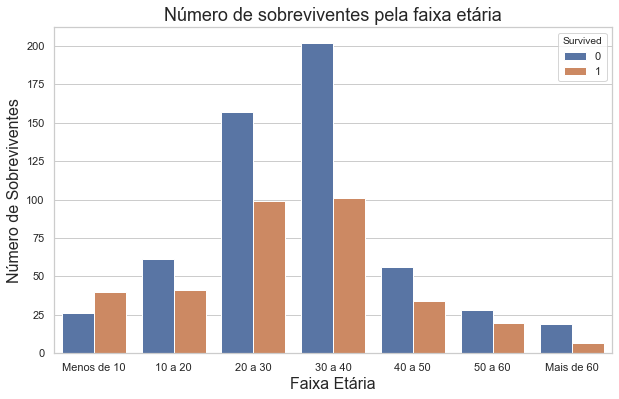

In [59]:
# Plotando o gráfico de sobreviventes pela faixa etária. OBS: 1 é para sobreviventes e 0 é para mortos.

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

ax = sns.countplot(x=df.AgeRange, hue=df.Survived, data=df)
ax.xaxis.set_label_text("Faixa Etária",fontdict= {'size':16})
ax.yaxis.set_label_text("Número de Sobreviventes", fontdict={'size':16})
ax.set_title("Número de sobreviventes pela faixa etária", fontdict={'size':18})
plt.show()

No gráfico é possível ver que as pessoas na faixa etária dos 20 aos 40 foram as que mais sobreviveram, mas não tenho certeza se essa interpretação está correta, pois, o número de pessoas nesta faixa etária é maior também.

# Verificando a relação entre os sobreviventes e o sexo por faixa etária

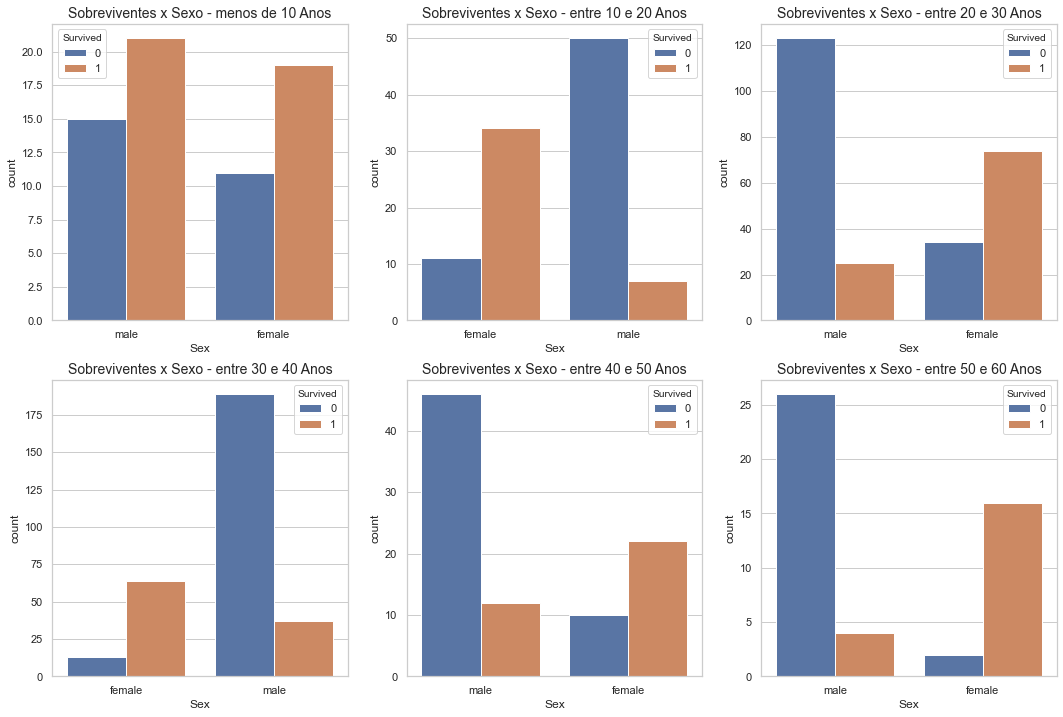

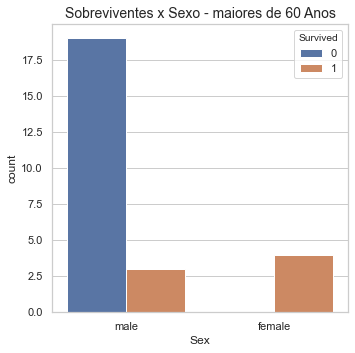

In [78]:
#Graficos de sobreviventes pelo sexo separados por idade.

menosDe10Anos = df.loc[df['Age']<10.0]
entre10e20Anos = df.query('Age>=10.0 and Age<20.0')
entre20e30Anos = df.query('Age>=20.0 and Age<30.0')
entre30e40Anos = df.query('Age>=30.0 and Age<40.0')
entre40e50Anos = df.query('Age>=40.0 and Age<50.0')
entre50e60Anos = df.query('Age>=50.0 and Age<60.0')
maisDe60Anos = df.loc[df['Age']>=60.0]

fig, ax = plt.subplots(2,3,figsize=(18,12))
sns.countplot(x=menosDe10Anos.Sex, hue=menosDe10Anos.Survived, data=menosDe10Anos, ax=ax[0][0])
ax[0, 0].set_title('Sobreviventes x Sexo - menos de 10 Anos', fontsize=14)
sns.countplot(x=entre10e20Anos.Sex, hue=entre10e20Anos.Survived, data=entre10e20Anos, ax=ax[0][1])
ax[0, 1].set_title('Sobreviventes x Sexo - entre 10 e 20 Anos', fontsize=14)
sns.countplot(x=entre20e30Anos.Sex, hue=entre20e30Anos.Survived, data=entre20e30Anos, ax=ax[0][2])
ax[0, 2].set_title('Sobreviventes x Sexo - entre 20 e 30 Anos', fontsize=14)
sns.countplot(x=entre30e40Anos.Sex, hue=entre30e40Anos.Survived, data=entre30e40Anos, ax=ax[1][0])
ax[1, 0].set_title('Sobreviventes x Sexo - entre 30 e 40 Anos', fontsize=14)
sns.countplot(x=entre40e50Anos.Sex, hue=entre40e50Anos.Survived, data=entre40e50Anos, ax=ax[1][1])
ax[1, 1].set_title('Sobreviventes x Sexo - entre 40 e 50 Anos', fontsize=14)
sns.countplot(x=entre50e60Anos.Sex, hue=entre50e60Anos.Survived, data=entre50e60Anos, ax=ax[1][2])
ax[1, 2].set_title('Sobreviventes x Sexo - entre 50 e 60 Anos', fontsize=14)
plt.show()
plt.figure(figsize=(5.3,5.3))
ax=sns.countplot(x=maisDe60Anos.Sex, hue=maisDe60Anos.Survived, data=maisDe60Anos)
ax.set_title('Sobreviventes x Sexo - maiores de 60 Anos', fontsize=14)
plt.show()

Percebe-se que entre as crianças menores de 10 anos, a taxa de sobreviventes é praticamente a mesma para ambos os sexos, mas essa diferença
aumenta a medida em que as idade vai aumentando também.
Conclusão: a maior parte dos sobreviventes são muheres e crianças com menos de 10 anos de idade.

# Verificando a relação entre a taxa de sobreviventes com pessoas que tinham irmãos ou cônjuges a bordo

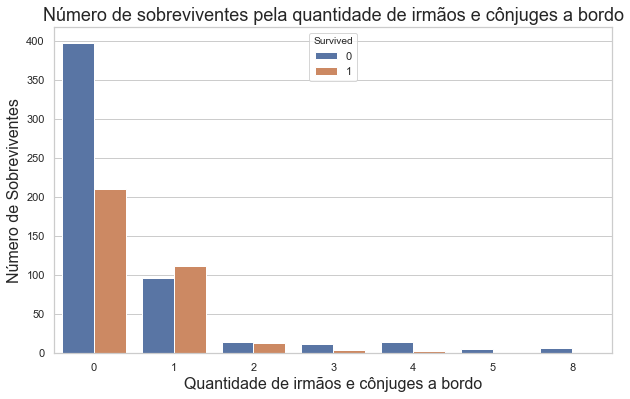

In [94]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

ax = sns.countplot(x=df.SibSp, hue=df.Survived, data=df)
ax.xaxis.set_label_text("Quantidade de irmãos e cônjuges a bordo",fontdict= {'size':16})
ax.yaxis.set_label_text("Número de Sobreviventes", fontdict={'size':16})
ax.set_title("Número de sobreviventes pela quantidade de irmãos e cônjuges a bordo", fontdict={'size':18})
plt.show()

Não consigo visualizar alguma relação entre o número de sobreviventes com o número de irmãos / cônjuge. Acredito que esta coluna não será relacionada no modelo computacional. 

# Verificando a relação entre a taxa de sobreviventes com pessoas que tinham pais / filhos a bordo

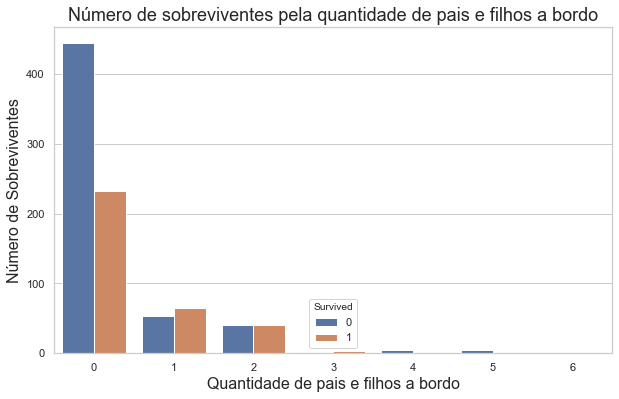

In [95]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

ax = sns.countplot(x=df.Parch, hue=df.Survived, data=df)
ax.xaxis.set_label_text("Quantidade de pais e filhos a bordo",fontdict= {'size':16})
ax.yaxis.set_label_text("Número de Sobreviventes", fontdict={'size':16})
ax.set_title("Número de sobreviventes pela quantidade de pais e filhos a bordo", fontdict={'size':18})
plt.show()

També não consigo visualizar alguma relação entre o número de sobreviventes com o número de pais e filhos. Acredito que esta coluna não será relacionada no modelo computacional.

O ticket não será analizado, pois acredito ser apenas números aleatórios. Espera não estar errado...

# Analizando o valor de taxa de embarque pelo número de sobreviventes:

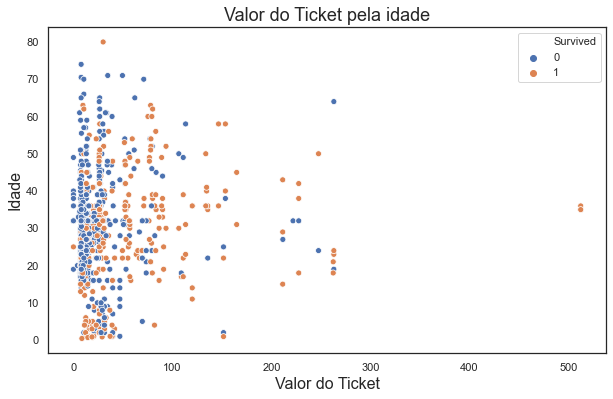

In [97]:
sns.set(style="white")
plt.figure(figsize=(10,6))

ax = sns.scatterplot(x=df.Fare, y=df.Age, hue=df.Survived, data=df)
ax.xaxis.set_label_text("Valor do Ticket",fontdict= {'size':16})
ax.yaxis.set_label_text("Idade", fontdict={'size':16})
ax.set_title("Valor do Ticket pela idade", fontdict={'size':18})
plt.show()

Percebe-se que a maioria dos que pagaram mais do que 90 libras aproximadamente sobreviveu. Vamos ver em valores numéricos.

In [192]:
#Numero de sobreviventes de quem pagou mais do que 85 libras no ticket.
classeAlta = df.query('Fare >= 85')
classeAlta.Survived.value_counts()

1    51
0    15
Name: Survived, dtype: int64

In [193]:
#transformando em porcentagem.
classeAlta.Survived.value_counts(normalize=True)

1    0.772727
0    0.227273
Name: Survived, dtype: float64

In [194]:
#Verifcando quantas mulheres de classe alta (tarifas maiores que 85 libras) que sobreviveram e morreram no nufrágio do titanic.

classeAlta.loc[classeAlta['Sex'] == 'female', 'Survived'].value_counts()

1    41
0     2
Name: Survived, dtype: int64

In [195]:
#Verifcando a porcentagem de mulheres de classe alta (tarifas maiores que 85 libras) que sobreviveram e morreram no nufrágio do titanic.

classeAlta.loc[classeAlta['Sex'] == 'female', 'Survived'].value_counts(normalize=True)

1    0.953488
0    0.046512
Name: Survived, dtype: float64

In [196]:
#Verifcando quantos homens de classe alta (tarifas maiores que 85 libras) que sobreviveram e morreram no nufrágio do titanic.

classeAlta.loc[classeAlta['Sex'] == 'male', 'Survived'].value_counts()

0    13
1    10
Name: Survived, dtype: int64

In [197]:
#Verifcando a porcentagem de homens de classe alta (tarifas maiores que 85 libras) que sobreviveram e morreram no nufrágio do titanic.

classeAlta.loc[classeAlta['Sex'] == 'male', 'Survived'].value_counts(normalize=True)

0    0.565217
1    0.434783
Name: Survived, dtype: float64

Analizando os valores para homens e mulheres percebe-se que dentre os homens que pagaram as maiores tarifas a taxa de sobrevivencia é um pouco mais alta do que a taxa de morte, já entre as mulheres percebe-se que a grande maioria sobreviveu.

Vamos analizar o mesmo gráfico novamente, mas focando em quem pagou tarifas menores no embarque.

In [198]:
menoresTarifas = df.loc[df['Fare']<85]

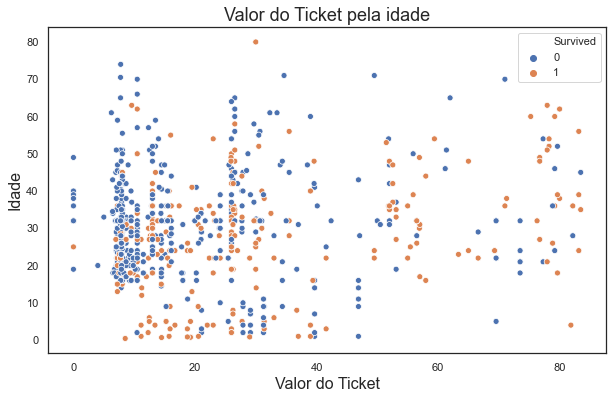

In [199]:
sns.set(style="white")
plt.figure(figsize=(10,6))

ax = sns.scatterplot(x=menoresTarifas.Fare, y=menoresTarifas.Age, hue=menoresTarifas.Survived, data=menoresTarifas)
ax.xaxis.set_label_text("Valor do Ticket",fontdict= {'size':16})
ax.yaxis.set_label_text("Idade", fontdict={'size':16})
ax.set_title("Valor do Ticket pela idade", fontdict={'size':18})
plt.show()

Visualmente percebe-se que quem pagou acima de 45 libras tem uma chance boa de sobrevivência, quem pagou entre 17 e 45 libras tem mais ou menos 50% de chance de sobreviver, mas quem pagou abaixo de 15 libras teve altas chances de morrer.

In [200]:
#Verificando a porcentagem de pessoas de classe média alta (tarifas entre 45 e 85 libras) que sobreviveram e morreram no nufrágio do titanic.

classeMediaAlta = df.query('Fare < 85 and Fare >= 45')
classeMediaAlta.Survived.value_counts(normalize=True)

1    0.571429
0    0.428571
Name: Survived, dtype: float64

In [201]:
#Verifcando quantas mulheres de classe média alta (tarifas entre 45 e 85 libras) que sobreviveram e morreram no nufrágio do titanic.

classeMediaAlta.loc[classeMediaAlta['Sex'] == 'female', 'Survived'].value_counts()

1    43
0     5
Name: Survived, dtype: int64

In [202]:
#Verifcando quantos homens de classe média alta (tarifas entre 45 e 85 libras) que sobreviveram e morreram no nufrágio do titanic.

classeMediaAlta.loc[classeMediaAlta['Sex'] == 'male', 'Survived'].value_counts()

0    40
1    17
Name: Survived, dtype: int64

In [203]:
#Verificando a porcentagem de pessoas de classe média baixa (tarifas entre 17 e 45 libras) que sobreviveram e morreram no nufrágio do titanic.

classeMediaBaixa = df.query('Fare < 45 and Fare >= 17')
classeMediaBaixa.Survived.value_counts(normalize=True)

0    0.558036
1    0.441964
Name: Survived, dtype: float64

In [204]:
#Verifcando quantas mulheres de classe média baixa (tarifas entre 17 e 45 libras) que sobreviveram e morreram no nufrágio do titanic.

classeMediaBaixa.loc[classeMediaBaixa['Sex'] == 'female', 'Survived'].value_counts()

1    62
0    30
Name: Survived, dtype: int64

In [205]:
#Verifcando quantos homens de classe média baixa (tarifas entre 17 e 45 libras) que sobreviveram e morreram no nufrágio do titanic.

classeMediaBaixa.loc[classeMediaBaixa['Sex'] == 'male', 'Survived'].value_counts()

0    95
1    37
Name: Survived, dtype: int64

In [207]:
#Verificando a porcentagem de pessoas de classe baixa (tarifas menores de 17 libras) que sobreviveram e morreram no nufrágio do titanic.

classeBaixa = df.query('Fare < 17')
classeBaixa.Survived.value_counts(normalize=True)

0    0.733871
1    0.266129
Name: Survived, dtype: float64

In [208]:
#Verifcando quantas mulheres de classe baixa (tarifas menores de 17 libras) que sobreviveram e morreram no nufrágio do titanic.

classeBaixa.loc[classeBaixa['Sex'] == 'female', 'Survived'].value_counts()

1    87
0    44
Name: Survived, dtype: int64

In [209]:
#Verifcando quantos homens de classe baixa (tarifas menores de 17 libras) que sobreviveram e morreram no nufrágio do titanic.

classeBaixa.loc[classeBaixa['Sex'] == 'male', 'Survived'].value_counts()

0    320
1     45
Name: Survived, dtype: int64